# < 청약 홈 데이터 분석 >

## Q1. 서울시도 청약 매물이 나오나?
###              
##      Q2. 특별공급 매물이 너무 적지는 않나?
###      
##           Q3. 보편적인 가정이 살 수 없는 크기의 매물만 나오지는 않나? (ex. 50cm^3미만)
###
##  Q4.너무 비싸지 않나...?
# ------------------------------------------
###  범위 : 서울 매물만!

>   - 스크롤 바닥까지 끌고 간다
>
>   - tbody를 끌고오자
>
###  메인 페이지 : 테이블 

>   - 테이블 통채로 가져오자
>
>   - 주택명/ 시공사/ 문의처/ 모집공고일 / 날짜 및 기간 정보 
>
### 상세 페이지 : 위치/공급 주택 수/평수/금액 정보 
>   - 위치 정보 -> '구' 데이터 추출
>   - 평균 공급 평수 및 금액
>   - 평당 평균 가격 비교
>
### 시각화
####   1. 서울시 구별 주택 공급 수 (막대)
####   2. 서울시 월별 주택 공급 추세 (히트맵)
####   3. 서울시 최근 주택 공급 추세 (막대)
####   4. 구별 평당 평균 가격 (막대 , 지도, BoxPlot)
####   5. 구별 평균 평수 비교(막대)
####   6. 특별 공급 비율(꺾은선)

# --------------------------------------------------------------------------------

## #1. 메인 페이지 분석 [서울]

#### 0. 환경설정

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = webdriver.ChromeOptions()

prefs = {'download.default_directory' : '/home/hyeji/dev_ws/eda/data',
         'download.promt_for_download': False}
options.add_experimental_option('prefs',prefs)

url = "https://www.applyhome.co.kr/ai/aia/selectAPTLttotPblancListView.do"
driver = webdriver.Chrome(service=Service("../driver/chromedriver-linux64/chromedriver"),
                          options=options)
driver.get(url)

In [ ]:
driver.quit()

#### 1. 서울 정보 조회

In [2]:
from selenium.webdriver.common.by import By
area = driver.find_element(By.ID, "cate02")
area_list = area.find_elements(By.TAG_NAME, "option")
area_name = [name.get_attribute("value") for name in area_list]
area_name = area_name[1:]

In [3]:
area.send_keys(area_name[8])

서울 탭으로 이동

In [4]:
driver.find_element(By.CLASS_NAME, "search_btn").click()

#### 2. 조회결과 테이블 가져오자

In [5]:
table = driver.find_element(By.TAG_NAME,"table")


#### colunms 데이터를 데려오자 

In [6]:
thead = table.find_element(By.ID,"listThead")
thead_list = thead.find_elements(By.TAG_NAME,"th")
for idx, name in enumerate(thead_list):
    print(str(idx) + " :  "+ name.text)

0 :  지역
1 :  주택
구분
2 :  분양/임대
3 :  주택명
4 :  시공사
5 :  문의처
6 :  모집공고일
7 :  청약기간
8 :  당첨자발표
9 :  특별공급
신청현황
10 :  1·2순위 경쟁률


In [7]:
thead_name = [name.text for name in thead_list]
thead_name

['지역',
 '주택\n구분',
 '분양/임대',
 '주택명',
 '시공사',
 '문의처',
 '모집공고일',
 '청약기간',
 '당첨자발표',
 '특별공급\n신청현황',
 '1·2순위 경쟁률']

In [8]:
tbody = table.find_element(By.TAG_NAME,"tbody")
tbody_list = tbody.find_elements(By.TAG_NAME,"tr")
for idx, name in enumerate(tbody_list):
    print(str(idx) + " :  "+ name.text)

0 :  서울 민영 분양주택 더샵 둔촌포레 (주)포스코이앤씨 ☎ 02-478-8878 2024-02-29 2024-03-11 ~ 2024-03-13 2024-03-20 신청현황 경쟁률
1 :  서울 민영 분양주택 에스아이팰리스 올림픽공원 에스테크건설 주식회사 ☎ 02-486-4388 2024-02-23 2024-03-04 ~ 2024-03-06 2024-03-13 신청현황 경쟁률
2 :  서울 민영 분양주택 경희궁 유보라 (주)반도건설 ☎ 1661-0161 2024-02-22 2024-03-04 ~ 2024-03-06 2024-03-12 신청현황 경쟁률
3 :  서울 민영 분양주택 메이플자이 지에스건설 주식회사 ☎ 1833-2566 2024-01-26 2024-02-05 ~ 2024-02-08 2024-02-16 신청현황 경쟁률
4 :  서울 민영 분양주택 포제스 한강 디엘이앤씨(주) ☎ 1899-7099 2024-01-12 2024-01-24 ~ 2024-01-26 2024-02-01 신청현황 경쟁률
5 :  서울 민영 분양주택 어반클라쎄목동 한바로이앤씨(주), 아하건설(주) ☎ 02-6101-0808 2023-12-19 2023-12-29 ~ 2024-01-02 2024-01-08 사업주체문의 경쟁률
6 :  서울 민영 분양주택 에스아이팰리스 강동 센텀Ⅱ (주)이엔건설 ☎ 02-486-4386 2023-12-15 2023-12-26 ~ 2023-12-28 2024-01-05 신청현황 경쟁률
7 :  서울 민영 분양주택 청계리버뷰자이 지에스건설 주식회사 ☎ 1833-7244 2023-12-01 2023-12-11 ~ 2023-12-13 2023-12-20 신청현황 경쟁률
8 :  서울 민영 분양주택 삼익 더 랩소디 (주)세담종합건설 ☎ 1599-9807 2023-11-27 2023-12-07 ~ 2023-12-08 2023-12-14 사업주체문의 경쟁률
9 :  서울 민영 분양주택 마포 푸르지오 어반피스 (주)대우건설 ☎ 02-538-0122 2023-11-

In [9]:
tbody_name = [name.text for name in tbody_list]
tbody_name

['서울 민영 분양주택 더샵 둔촌포레 (주)포스코이앤씨 ☎ 02-478-8878 2024-02-29 2024-03-11 ~ 2024-03-13 2024-03-20 신청현황 경쟁률',
 '서울 민영 분양주택 에스아이팰리스 올림픽공원 에스테크건설 주식회사 ☎ 02-486-4388 2024-02-23 2024-03-04 ~ 2024-03-06 2024-03-13 신청현황 경쟁률',
 '서울 민영 분양주택 경희궁 유보라 (주)반도건설 ☎ 1661-0161 2024-02-22 2024-03-04 ~ 2024-03-06 2024-03-12 신청현황 경쟁률',
 '서울 민영 분양주택 메이플자이 지에스건설 주식회사 ☎ 1833-2566 2024-01-26 2024-02-05 ~ 2024-02-08 2024-02-16 신청현황 경쟁률',
 '서울 민영 분양주택 포제스 한강 디엘이앤씨(주) ☎ 1899-7099 2024-01-12 2024-01-24 ~ 2024-01-26 2024-02-01 신청현황 경쟁률',
 '서울 민영 분양주택 어반클라쎄목동 한바로이앤씨(주), 아하건설(주) ☎ 02-6101-0808 2023-12-19 2023-12-29 ~ 2024-01-02 2024-01-08 사업주체문의 경쟁률',
 '서울 민영 분양주택 에스아이팰리스 강동 센텀Ⅱ (주)이엔건설 ☎ 02-486-4386 2023-12-15 2023-12-26 ~ 2023-12-28 2024-01-05 신청현황 경쟁률',
 '서울 민영 분양주택 청계리버뷰자이 지에스건설 주식회사 ☎ 1833-7244 2023-12-01 2023-12-11 ~ 2023-12-13 2023-12-20 신청현황 경쟁률',
 '서울 민영 분양주택 삼익 더 랩소디 (주)세담종합건설 ☎ 1599-9807 2023-11-27 2023-12-07 ~ 2023-12-08 2023-12-14 사업주체문의 경쟁률',
 '서울 민영 분양주택 마포 푸르지오 어반피스 (주)대우건설 ☎ 02-538-0122 2023-11-24 2023-12-0

공백 수가 규칙적인 숫자 요소들만 먼저 분리하자

모집공고일 / 청약기간 / 당첨자 발표

In [10]:
posted_date = [t.split(' ')[-7] for t in tbody_name]
announcement_date = [t.split(' ')[-3] for t in tbody_name]
during_date = [''.join(t.split(' ')[-6:-3]) for t in tbody_name]

posted_date, announcement_date, during_date

(['2024-02-29',
  '2024-02-23',
  '2024-02-22',
  '2024-01-26',
  '2024-01-12',
  '2023-12-19',
  '2023-12-15',
  '2023-12-01',
  '2023-11-27',
  '2023-11-24'],
 ['2024-03-20',
  '2024-03-13',
  '2024-03-12',
  '2024-02-16',
  '2024-02-01',
  '2024-01-08',
  '2024-01-05',
  '2023-12-20',
  '2023-12-14',
  '2023-12-12'],
 ['2024-03-11~2024-03-13',
  '2024-03-04~2024-03-06',
  '2024-03-04~2024-03-06',
  '2024-02-05~2024-02-08',
  '2024-01-24~2024-01-26',
  '2023-12-29~2024-01-02',
  '2023-12-26~2023-12-28',
  '2023-12-11~2023-12-13',
  '2023-12-07~2023-12-08',
  '2023-12-04~2023-12-06'])

주택명

In [11]:
house_name = tbody.find_elements(By.TAG_NAME,"b")
for idx, name in enumerate(house_name):
    print(str(idx) + " :  "+ name.text)

0 :  더샵 둔촌포레
1 :  에스아이팰리스 올림픽공원
2 :  경희궁 유보라
3 :  메이플자이
4 :  포제스 한강
5 :  어반클라쎄목동
6 :  에스아이팰리스 강동 센텀Ⅱ
7 :  청계리버뷰자이
8 :  삼익 더 랩소디
9 :  마포 푸르지오 어반피스


시공사

In [12]:
company_name = tbody.find_elements(By.CLASS_NAME,"word_cut")
for idx, name in enumerate(company_name):
    print(str(idx) + " :  "+ name.text)

0 :  (주)포스코이앤씨
1 :  에스테크건설 주식회사
2 :  (주)반도건설
3 :  지에스건설 주식회사
4 :  디엘이앤씨(주)
5 :  한바로이앤씨(주), 아하건설(주)
6 :  (주)이엔건설
7 :  지에스건설 주식회사
8 :  (주)세담종합건설
9 :  (주)대우건설


In [14]:
call_name = tbody.find_elements(By.CLASS_NAME,"btn_org")
for idx, name in enumerate(call_name):
    print(str(idx) + " :  "+ name.text)

0 :  ☎ 02-478-8878
1 :  ☎ 02-486-4388
2 :  ☎ 1661-0161
3 :  ☎ 1833-2566
4 :  ☎ 1899-7099
5 :  ☎ 02-6101-0808
6 :  ☎ 02-486-4386
7 :  ☎ 1833-7244
8 :  ☎ 1599-9807
9 :  ☎ 02-538-0122


ㅇㅋ 한번에 가져와보자

In [146]:
house_name2 = tbody.find_elements(By.TAG_NAME,"b")
company_name2 = tbody.find_elements(By.CLASS_NAME,"word_cut")
call_name2 = tbody.find_elements(By.CLASS_NAME,"btn_org")

In [147]:
house_list = []
company_list = []
call_list = []

for house, company, call in zip(house_name2, company_name2, call_name2):
    house_list.append(house.text)
    company_list.append(company.text)
    call_list.append(call.text)

len(house_list), len(company_list), len(call_list)

(10, 10, 10)

In [148]:
house_list

['더샵 둔촌포레',
 '에스아이팰리스 올림픽공원',
 '경희궁 유보라',
 '메이플자이',
 '포제스 한강',
 '어반클라쎄목동',
 '에스아이팰리스 강동 센텀Ⅱ',
 '청계리버뷰자이',
 '삼익 더 랩소디',
 '마포 푸르지오 어반피스']

In [149]:
company_list

['(주)포스코이앤씨',
 '에스테크건설 주식회사',
 '(주)반도건설',
 '지에스건설 주식회사',
 '디엘이앤씨(주)',
 '한바로이앤씨(주), 아하건설(주)',
 '(주)이엔건설',
 '지에스건설 주식회사',
 '(주)세담종합건설',
 '(주)대우건설']

In [16]:
call_list

['☎ 02-478-8878',
 '☎ 02-486-4388',
 '☎ 1661-0161',
 '☎ 1833-2566',
 '☎ 1899-7099',
 '☎ 02-6101-0808',
 '☎ 02-486-4386',
 '☎ 1833-7244',
 '☎ 1599-9807',
 '☎ 02-538-0122']

#### 2. 다음 페이지로 넘어가자

In [194]:
page = driver.find_element(By.ID,"paging")
pnum = page.find_elements(By.TAG_NAME,"a")
for p in range(len(pnum)):
    print(pnum[p].text)

1
2
3
4


In [153]:
for element in pnum:
    title_value = element.get_attribute("title")
    if title_value:
        print(title_value, element.text)

현재페이지 1


In [68]:
import time
for element in pnum:
    title_value = element.get_attribute("title")
    if title_value != None:
        print(title_value, element.text)
        continue
    element.click()
    time.sleep(1)
    page = driver.find_element(By.ID,"paging")
    pnum = page.find_elements(By.TAG_NAME,"a")
    #print(element.text)

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=122.0.6261.94); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
#0 0x561a8c1ade93 <unknown>
#1 0x561a8bea5ce6 <unknown>
#2 0x561a8beb5c25 <unknown>
#3 0x561a8beaba18 <unknown>
#4 0x561a8beabb41 <unknown>
#5 0x561a8bea9e11 <unknown>
#6 0x561a8bead112 <unknown>
#7 0x561a8bf328a8 <unknown>
#8 0x561a8bf12eb2 <unknown>
#9 0x561a8bf31899 <unknown>
#10 0x561a8bf12c53 <unknown>
#11 0x561a8bee3db3 <unknown>
#12 0x561a8bee477e <unknown>
#13 0x561a8c1737cb <unknown>
#14 0x561a8c1777e5 <unknown>
#15 0x561a8c1610e1 <unknown>
#16 0x561a8c178372 <unknown>
#17 0x561a8c1451bf <unknown>
#18 0x561a8c19c488 <unknown>
#19 0x561a8c19c683 <unknown>
#20 0x561a8c1ad044 <unknown>
#21 0x7f3713494ac3 <unknown>


페이지가 바뀔 떄 마다 주소가 바뀌네 ㅎㅎ;;

In [157]:
import time
from selenium.common.exceptions import StaleElementReferenceException

for p in range(len(pnum)):
    print("현재 페이지는")
    print(p+1)
    try:
        if pnum[p].get_attribute("title"):
            print("---------------------")
            print(title_value, element.text)
            print("---------------------")
            continue
        pnum[p].click()
        time.sleep(1)
        page = driver.find_element(By.ID,"paging")
        pnum = page.find_elements(By.TAG_NAME,"a")
        print("다시 파싱한 뒤")
        print(p+1)
    except StaleElementReferenceException:
        print("페이지가 변경되어 다시 파싱합니다.")
        page = driver.find_element(By.ID,"paging")
        pnum = page.find_elements(By.TAG_NAME,"a")
        pnum[p].click()
        time.sleep(1)
        print("다시 클릭한 후 다시 파싱한 뒤")
        print(p+1)


현재 페이지는
1
다시 파싱한 뒤
1
현재 페이지는
2
다시 파싱한 뒤
2
현재 페이지는
3
다시 파싱한 뒤
3
현재 페이지는
4
다시 파싱한 뒤
4


## #2. 테이블에서 필요한 기본정보 전부 긁어오기

In [14]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()

prefs = {'download.default_directory' : '/home/hyeji/dev_ws/eda/data',
         'download.promt_for_download': False}
options.add_experimental_option('prefs',prefs)

url = "https://www.applyhome.co.kr/ai/aia/selectAPTLttotPblancListView.do"
driver = webdriver.Chrome(service=Service("../driver/chromedriver-linux64/chromedriver"),
                          options=options)
driver.get(url)

#서울 범위 설정
area = driver.find_element(By.ID, "cate02")
area_list = area.find_elements(By.TAG_NAME, "option")
area_name = [name.get_attribute("value") for name in area_list]
area_name = area_name[1:]

#서울 탭으로 이동
area.send_keys(area_name[8])
driver.find_element(By.CLASS_NAME, "search_btn").click()
time.sleep(0.5)

#필요한 변수 선언
house_list2 = []
company_list2 = []
call_list2 = []
posted_list2 = []
during_list2 = []
announcement_list2 = []

page = driver.find_element(By.ID,"paging")
pnum = page.find_elements(By.TAG_NAME,"a")

for p in range(len(pnum)):
    print("현재 페이지는")
    print(p+1)
    table = driver.find_element(By.TAG_NAME,"table") #해당 페이지 테이블 가져옴
    time.sleep(1.0)

    try:
        if pnum[p].get_attribute("title"):
            print("---------------------")
            #print(title_value, element.text)
            print("---------------------")
        else :
            pnum[p].click()
            time.sleep(1)
        page = driver.find_element(By.ID,"paging")
        pnum = page.find_elements(By.TAG_NAME,"a")
        print("다시 파싱한 뒤")
        print(p+1)
        #날짜 정보 가져오기
        table = driver.find_element(By.TAG_NAME,"table")
        tbody = table.find_element(By.TAG_NAME,"tbody")
        tbody_list = tbody.find_elements(By.TAG_NAME,"tr")
        time.sleep(0.5)
        tbody_list = [name.text for name in tbody_list]
        posted_date = [t.split(' ')[-7] for t in tbody_list]
        announcement_date = [t.split(' ')[-3] for t in tbody_list]
        during_date = [''.join(t.split(' ')[-6:-3]) for t in tbody_list]
        time.sleep(1.0)
        for post, during, announce in zip(posted_date, during_date, announcement_date):
            posted_list2.append(post)
            during_list2.append(during)
            announcement_list2.append(announce)
            time.sleep(0.5)

        #아파트이름/건설사/전화번호 가져오기
        house_name2 = tbody.find_elements(By.TAG_NAME,"b")
        company_name2 = tbody.find_elements(By.CLASS_NAME,"word_cut")
        call_name2 = tbody.find_elements(By.CLASS_NAME,"btn_org")
        for house, company, call in zip(house_name2, company_name2, call_name2):
            house_list2.append(house.text)
            company_list2.append(company.text)
            call_list2.append(call.text)
            time.sleep(0.5)
        print("정보 다 가져왔다 페이지 넘기자 ")

    except StaleElementReferenceException:
        print("페이지가 변경되어 다시 파싱합니다.")
        page = driver.find_element(By.ID,"paging")
        pnum = page.find_elements(By.TAG_NAME,"a")
        pnum[p].click()
        time.sleep(1)
        print("다시 클릭한 후 다시 파싱한 뒤")
        print(p+1)


현재 페이지는
1
---------------------
---------------------
다시 파싱한 뒤
1
정보 다 가져왔다 페이지 넘기자 
현재 페이지는
2
다시 파싱한 뒤
2
정보 다 가져왔다 페이지 넘기자 
현재 페이지는
3
다시 파싱한 뒤
3
정보 다 가져왔다 페이지 넘기자 
현재 페이지는
4
다시 파싱한 뒤
4
정보 다 가져왔다 페이지 넘기자 


In [15]:
house_list2 , len(house_list2)

(['더샵 둔촌포레',
  '에스아이팰리스 올림픽공원',
  '경희궁 유보라',
  '메이플자이',
  '포제스 한강',
  '어반클라쎄목동',
  '에스아이팰리스 강동 센텀Ⅱ',
  '청계리버뷰자이',
  '삼익 더 랩소디',
  '마포 푸르지오 어반피스',
  '힐스테이트 e편한세상 문정',
  '도봉 금호어울림 리버파크',
  '이문 아이파크 자이',
  'e편한세상 강동 프레스티지원',
  '천호역 마에스트로',
  '더샵 강동센트럴시티',
  'e편한세상 답십리 아르테포레(국민주택)',
  '힐스테이트 관악센트씨엘',
  '보문 센트럴 아이파크',
  '호반써밋 개봉',
  '상도 푸르지오 클라베뉴',
  '청계 SK VIEW',
  '래미안 라그란데',
  '수유 시그니티',
  '롯데캐슬 이스트폴',
  '강동 중앙하이츠 시티',
  '용산 호반써밋 에이디션',
  '둔촌 현대수린나',
  '청량리 롯데캐슬 하이루체',
  '서울대벤처타운역 푸르지오',
  'DMC 가재울 아이파크',
  '새절역 두산위브 트레지움'],
 32)

In [16]:
company_list2 , len(company_list2)

(['(주)포스코이앤씨',
  '에스테크건설 주식회사',
  '(주)반도건설',
  '지에스건설 주식회사',
  '디엘이앤씨(주)',
  '한바로이앤씨(주), 아하건설(주)',
  '(주)이엔건설',
  '지에스건설 주식회사',
  '(주)세담종합건설',
  '(주)대우건설',
  '현대엔지니어링(주), DL e&c',
  '금호건설(주)',
  '에이치디씨현대산업개발 주식회사, GS건설주식회사',
  '디엘이앤씨(주)',
  '주식회사 한미글로벌 E&C',
  '(주)포스코이앤씨',
  '디엘건설 주식회사',
  '현대건설(주)',
  '에이치디씨현대산업개발 주식회사',
  '(주)호반건설',
  '대우건설',
  '에스케이에코플랜트(주)',
  '삼성물산(주)',
  '리센종합건설(주)',
  '롯데건설(주)',
  '중앙건설 주식회사',
  '(주)호반건설',
  '보훈종합건설(주)',
  '롯데건설(주)',
  '(주)대우건설',
  '에이치디씨현대산업개발 주식회사',
  '두산건설(주)'],
 32)

In [17]:
call_list2, len(call_list2)

(['☎ 02-478-8878',
  '☎ 02-486-4388',
  '☎ 1661-0161',
  '☎ 1833-2566',
  '☎ 1899-7099',
  '☎ 02-6101-0808',
  '☎ 02-486-4386',
  '☎ 1833-7244',
  '☎ 1599-9807',
  '☎ 02-538-0122',
  '☎ 1600-4990',
  '☎ 02-955-8801',
  '☎ 1600-6554',
  '☎ 02-6427-2500',
  '☎ 1533-4551',
  '☎ 1661-2001',
  '☎ 02-3394-4494',
  '☎ 02-873-2678',
  '☎ 1600-5727',
  '☎ 1670-3590',
  '☎ 02-575-0771',
  '☎ 02-960-7705',
  '☎ 02-407-3069',
  '☎ 02-987-5053',
  '☎ 1533-1616',
  '☎ 1877-6875',
  '☎ 1670-6207',
  '☎ 02-489-6050',
  '☎ 1899-9882',
  '☎ 1599-4948',
  '☎ 1811-6062',
  '☎ 1566-7749'],
 32)

## #3. 상세정보 페이지 

In [18]:
from selenium.webdriver.common.keys import Keys
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")

In [27]:
house_name[1].click()

In [56]:
driver.find_element(By.XPATH,'''/html/body/div[4]/div/button''').click()

In [33]:
info2 = driver.find_element(By.XPATH,'''/html/body/div[4]''')

info3 = driver.find_element(By.ID, 'iframeDialog')
info3.text

#hidden_html = driver.find_element(By.XPATH,'''/html''')
#hidden_html.text



''

/html/body/div[4]
/html/body/div[4]
/html/body/div[4]

//*[@id="printArea"]/table[2]/tbody

//*[@id="printArea"]/div[2]/table/tbody

In [37]:
driver.current_url

'https://www.applyhome.co.kr/ai/aia/selectAPTLttotPblancListView.do#a'

HTML에서 필요한 정보만 빼오기

In [25]:
from bs4 import BeautifulSoup

# HTML 문서 읽기
with open('test2.html', 'r', encoding='utf-8') as file:
    html_doc = file.read()

# BeautifulSoup 객체 생성
soup_detail = BeautifulSoup(html_doc, 'html.parser')
popup_table = soup_detail.find('table',class_='tbl_st tbl_normal tbl_center')
detail_data = popup_table.text.split('\n')
detail_list = [x.replace('\t','') for x in detail_data]
detail_list = [x for x in detail_list if x]
detail_list

['입주자모집공고 주요정보',
 '더샵 둔촌포레',
 '공급위치  ',
 '서울특별시 강동구 둔촌동 30-4번지 외 1필지',
 '공급규모',
 '74세대',
 '입주자모집공고 관련 문의',
 '사업주체 또는 분양사무실로 문의',
 '문의처',
 '☎ 02-478-8878']

In [21]:
detail_list[1:6:2]



['더샵 둔촌포레', '서울특별시 강동구 둔촌동 30-4번지 외 1필지', '74세대']

아....근데....HTML주소가 계속 바뀌네........
>
심지어.....숨어있는 html이 읽히지도 않네....

In [50]:
import requests
from bs4 import BeautifulSoup

page2 = driver.page_source
soup = BeautifulSoup(page2, "html.parser")


# 팝업 요소 식별 및 내용 가져오기
popup = soup.find("body", {"class": "popBody"})
hide_info = popup.find("html")
if popup:
    print(popup)
else:
    print("팝업 요소를 찾을 수 없습니다.")


AttributeError: 'NoneType' object has no attribute 'find'

이게...최선은 아니겠지만...일단...이렇게...(feat.머리가 나쁘면 손이 고생한다)

In [19]:
from bs4 import BeautifulSoup

result = []

for i in range(32):
    filename = f"./house_html/house{i}.html"  # 파일 경로 수정
    with open(filename, "r", encoding="utf-8") as file:
        html_content = file.read()

    # BeautifulSoup 객체 생성
    soup_detail = BeautifulSoup(html_content, 'html.parser')
    popup_table = soup_detail.find('table', class_='tbl_st tbl_normal tbl_center')
    detail_data = popup_table.text.split('\n')
    detail_list = [x.replace('\t', '') for x in detail_data]
    detail_list = [x for x in detail_list if x]
    result.append(detail_list[1:6:2])
    
    file.close()

result, len(result)

([['더샵 둔촌포레', '서울특별시 강동구 둔촌동 30-4번지 외 1필지', '74세대'],
  ['에스아이팰리스 올림픽공원', '서울특별시 강동구 성내동 459-3', '58세대'],
  ['경희궁 유보라', '서울특별시 서대문구 영천동 69-20외 160필지', '108세대'],
  ['메이플자이', '서울특별시 서초구 잠원동 60-3', '162세대'],
  ['포제스 한강', '서울특별시 광진구 광장동 188-2번지 일원', '128세대'],
  ['어반클라쎄목동', '서울특별시 양천구 신목로2길 7-12 (신정동, 어반클라쎄 목동)', '45세대'],
  ['에스아이팰리스 강동 센텀Ⅱ', '서울특별시 강동구 길동 386-4 (길동, 에스아이팰리스 강동 센텀2)', '80세대'],
  ['청계리버뷰자이', '서울특별시 성동구 용답동 108-1번지 일원', '797세대'],
  ['삼익 더 랩소디', '서울특별시 강서구 강서로 353 (내발산동)', '45세대'],
  ['마포 푸르지오 어반피스', '서울특별시 마포구 아현동 613-10번지 일원', '122세대'],
  ['힐스테이트 e편한세상 문정', '서울특별시 송파구 문정동 136번지', '299세대'],
  ['도봉 금호어울림 리버파크', '서울특별시 도봉구 도봉2동 95번지', '130세대'],
  ['이문 아이파크 자이', '서울특별시 동대문구 이문동 149-8, 412-1번지 일대 ', '1467세대'],
  ['e편한세상 강동 프레스티지원', '서울특별시 강동구 천호동 423-76번지 일대', '263세대'],
  ['천호역 마에스트로', '서울특별시 강동구 천호동 334-2', '77세대'],
  ['더샵 강동센트럴시티', '서울특별시 강동구 천호동 410-100번지 일원', '168세대'],
  ['e편한세상 답십리 아르테포레(국민주택)', '서울특별시 동대문구 답십리동 12번지 일대', '121세대'],
  ['힐스테이트 관악센트씨엘', '서울특별시 관악구 봉천동 산101번지 일대'

In [30]:
from bs4 import BeautifulSoup

# HTML 문서 읽기
with open('test2.html', 'r', encoding='utf-8') as file:
    html_doc = file.read()

# BeautifulSoup 객체 생성
soup_detail = BeautifulSoup(html_doc, 'html.parser')
popup_table2 = soup_detail.find_all('table',class_='tbl_st tbl_row tbl_col tbl_center')
households_supplied =  popup_table2[1].get_text().split('\n')
households_supplied= [x for x in households_supplied if x][-3:]
households_supplied

['47', '27', '74']

In [61]:
houseprices_supplied =  popup_table2[-2].get_text().split('\n')
houseprices_supplied= [x for x in houseprices_supplied if x][4:]
del houseprices_supplied[2]
houseprices_supplied

['059.9700 ',
 '67,980',
 '059.9700T',
 '71,560',
 '076.8100 ',
 '78,830',
 '084.9800A',
 '88,500',
 '084.9600B',
 '86,430',
 '084.9900C',
 '86,600',
 '084.9800T',
 '99,340',
 '084.9600T',
 '95,180',
 '084.9900T',
 '96,810']

In [62]:
scale = []
prices = []

for i, item in enumerate(houseprices_supplied):
    if i % 2 == 0:  # 짝수 인덱스
        split_item = item.split('.')[0]
        scale.append(split_item)
    else:  # 홀수 인덱스
        price_item = item.replace(',', '')
        prices.append(price_item)

print("scale:", scale)
print("prices:", prices)

scale: ['059', '059', '076', '084', '084', '084', '084', '084', '084']
prices: ['67980', '71560', '78830', '88500', '86430', '86600', '99340', '95180', '96810']


In [65]:
import numpy as np
avg_scale = np.round(np.mean([float(item) for item in scale]),2)
avg_prices = np.round(np.mean([float(price) for price in prices]),2)
print("평균 scale:", avg_scale)
print("평균 prices:", avg_prices)


평균 scale: 77.56
평균 prices: 85692.22


In [66]:
from bs4 import BeautifulSoup

result_address= []
result_house_num = []
avg_scale = []
avg_prices = []


for i in range(32):

    scale = []
    prices = []

    filename = f"./house_html/house{i}.html"  
    with open(filename, "r", encoding="utf-8") as file:
        html_content = file.read()

    soup_detail = BeautifulSoup(html_content, 'html.parser')

    popup_table = soup_detail.find('table', class_='tbl_st tbl_normal tbl_center')
    detail_data = popup_table.text.split('\n')
    detail_list = [x.replace('\t', '') for x in detail_data]
    detail_list = [x for x in detail_list if x]
    result_address.append(detail_list[1:6:2])

    popup_table2 = soup_detail.find_all('table',class_='tbl_st tbl_row tbl_col tbl_center')
    households_supplied =  popup_table2[1].get_text().split('\n')
    households_supplied= [x for x in households_supplied if x][-3:]
    result_house_num.append(households_supplied)

    houseprices_supplied =  popup_table2[-2].get_text().split('\n')
    houseprices_supplied= [x for x in houseprices_supplied if x][4:]
    del houseprices_supplied[2]


    for i, item in enumerate(houseprices_supplied):
        if i % 2 == 0:  
            split_item = item.split('.')[0]
            scale.append(split_item)
        else:  
            price_item = item.replace(',', '')
            prices.append(price_item)

    avg_scale.append(np.round(np.mean([float(item) for item in scale]),2))
    avg_prices.append(np.round(np.mean([float(price) for price in prices]),2))

    file.close()

len(result_address) , len(result_house_num) , len(avg_scale), len(avg_prices)

(32, 32, 32, 32)

In [33]:
result_house_num[1]

['37', '21', '58']

필요한 정보만 담은 리스트 생성 

In [68]:
address_list = [r[1] for r in result_address]
scale_list = [r[2] for r in result_address]

nomal_supply = [r[0] for r in result_house_num]
special_supply = [r[1] for r in result_house_num]
total_supply = [r[2] for r in result_house_num]

## 4. 데이터 프레임 만들기 

#### 1. house_avg_data 생성 (평균 가격,평수, 특별공급 데이터를 갖고 있는;;)

In [70]:
import pandas as pd

house_data1 = pd.DataFrame({"주택명":house_list2,
                           "소재지":address_list,
                           "일반 공급":nomal_supply,
                           "특별 공급":special_supply,
                           "세대 수":total_supply,
                           "평균 평수":avg_scale,
                           "평균 가격":avg_prices
                           })
house_data1

,주택명,소재지,일반 공급,특별 공급,세대 수,평균 평수,평균 가격
0,더샵 둔촌포레,서울특별시 강동구 둔촌동 30-4번지 외 1필지,47,27,74,93.33,148540.00
1,에스아이팰리스 올림픽공원,서울특별시 강동구 성내동 459-3,37,21,58,52.00,123666.67
2,경희궁 유보라,서울특별시 서대문구 영천동 69-20외 160필지,57,51,108,77.75,127125.00
3,메이플자이,서울특별시 서초구 잠원동 60-3,81,81,162,50.00,149850.00
4,포제스 한강,서울특별시 광진구 광장동 188-2번지 일원,94,34,128,178.00,1048571.43
5,어반클라쎄목동,"서울특별시 양천구 신목로2길 7-12 (신정동, 어반클라쎄 목동)",45,0,45,52.25,93593.75
6,에스아이팰리스 강동 센텀Ⅱ,"서울특별시 강동구 길동 386-4 (길동, 에스아이팰리스 강동 센텀2)",49,31,80,36.83,54216.67
7,청계리버뷰자이,서울특별시 성동구 용답동 108-1번지 일원,397,400,797,68.67,114440.00
8,삼익 더 랩소디,서울특별시 강서구 강서로 353 (내발산동),45,0,45,44.00,107500.00
9,마포 푸르지오 어반피스,서울특별시 마포구 아현동 613-10번지 일원,64,58,122,70.00,131368.00


In [71]:
house_data1['세대 수']=[data.replace(',','') for data in house_data1["세대 수"]]
house_data1.head()

,주택명,소재지,일반 공급,특별 공급,세대 수,평균 평수,평균 가격
0,더샵 둔촌포레,서울특별시 강동구 둔촌동 30-4번지 외 1필지,47,27,74,93.33,148540.00
1,에스아이팰리스 올림픽공원,서울특별시 강동구 성내동 459-3,37,21,58,52.00,123666.67
2,경희궁 유보라,서울특별시 서대문구 영천동 69-20외 160필지,57,51,108,77.75,127125.00
3,메이플자이,서울특별시 서초구 잠원동 60-3,81,81,162,50.00,149850.00
4,포제스 한강,서울특별시 광진구 광장동 188-2번지 일원,94,34,128,178.00,1048571.43


In [72]:
house_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주택명     32 non-null     object 
 1   소재지     32 non-null     object 
 2   일반 공급   32 non-null     object 
 3   특별 공급   32 non-null     object 
 4   세대 수    32 non-null     object 
 5   평균 평수   32 non-null     float64
 6   평균 가격   32 non-null     float64
dtypes: float64(2), object(5)
memory usage: 1.9+ KB


평균 계산하기 위해 형변환 

In [73]:
house_data1["일반 공급"]= house_data1["일반 공급"].astype('float')
house_data1["특별 공급"]= house_data1["특별 공급"].astype('float')
house_data1["세대 수"]= house_data1["세대 수"].astype('float')

In [74]:
house_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주택명     32 non-null     object 
 1   소재지     32 non-null     object 
 2   일반 공급   32 non-null     float64
 3   특별 공급   32 non-null     float64
 4   세대 수    32 non-null     float64
 5   평균 평수   32 non-null     float64
 6   평균 가격   32 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.9+ KB


In [75]:
house_data1["특별 공급 비율"] = (house_data1["특별 공급"] / house_data1["세대 수"]).round(2)
house_data1["평당 평균 가격"] = (house_data1["평균 가격"] / house_data1["평균 평수"]).round(2)

In [76]:
house_data1

,주택명,소재지,일반 공급,특별 공급,세대 수,평균 평수,평균 가격,특별 공급 비율,평당 평균 가격
0,더샵 둔촌포레,서울특별시 강동구 둔촌동 30-4번지 외 1필지,47.0,27.0,74.0,93.33,148540.00,0.36,1591.56
1,에스아이팰리스 올림픽공원,서울특별시 강동구 성내동 459-3,37.0,21.0,58.0,52.00,123666.67,0.36,2378.21
2,경희궁 유보라,서울특별시 서대문구 영천동 69-20외 160필지,57.0,51.0,108.0,77.75,127125.00,0.47,1635.05
3,메이플자이,서울특별시 서초구 잠원동 60-3,81.0,81.0,162.0,50.00,149850.00,0.50,2997.00
4,포제스 한강,서울특별시 광진구 광장동 188-2번지 일원,94.0,34.0,128.0,178.00,1048571.43,0.27,5890.85
5,어반클라쎄목동,"서울특별시 양천구 신목로2길 7-12 (신정동, 어반클라쎄 목동)",45.0,0.0,45.0,52.25,93593.75,0.00,1791.27
6,에스아이팰리스 강동 센텀Ⅱ,"서울특별시 강동구 길동 386-4 (길동, 에스아이팰리스 강동 센텀2)",49.0,31.0,80.0,36.83,54216.67,0.39,1472.08
7,청계리버뷰자이,서울특별시 성동구 용답동 108-1번지 일원,397.0,400.0,797.0,68.67,114440.00,0.50,1666.52
8,삼익 더 랩소디,서울특별시 강서구 강서로 353 (내발산동),45.0,0.0,45.0,44.00,107500.00,0.00,2443.18
9,마포 푸르지오 어반피스,서울특별시 마포구 아현동 613-10번지 일원,64.0,58.0,122.0,70.00,131368.00,0.48,1876.69


데이터들의 길이가 전부 일치하는지 먼저 확인하고

In [20]:
len(house_list2), len(company_list2), len(call_list2), len(announcement_list2)

(32, 32, 32, 32)

In [78]:
address_list = [r[1] for r in result]
scale_list = [r[2] for r in result]

len(address_list), len(scale_list)

(32, 32)

#### 2.  기간과 시공사 정보가 담긴 [house_data] 생성 !

In [22]:
import pandas as pd

house_data = pd.DataFrame({"주택명":house_list2,
                           "소재지":address_list,
                           "세대 수":scale_list,
                           "시공사": company_list2,
                           "문의처":call_list2,
                           "모집공고일":posted_list2,
                           "청약기간":during_list2,
                           "당첨자 발표":announcement_list2})
house_data

/tmp/ipykernel_5413/2628626768.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,주택명,소재지,세대 수,시공사,문의처,모집공고일,청약기간,당첨자 발표
0,더샵 둔촌포레,서울특별시 강동구 둔촌동 30-4번지 외 1필지,74세대,(주)포스코이앤씨,☎ 02-478-8878,2024-02-29,2024-03-11~2024-03-13,2024-03-20
1,에스아이팰리스 올림픽공원,서울특별시 강동구 성내동 459-3,58세대,에스테크건설 주식회사,☎ 02-486-4388,2024-02-23,2024-03-04~2024-03-06,2024-03-13
2,경희궁 유보라,서울특별시 서대문구 영천동 69-20외 160필지,108세대,(주)반도건설,☎ 1661-0161,2024-02-22,2024-03-04~2024-03-06,2024-03-12
3,메이플자이,서울특별시 서초구 잠원동 60-3,162세대,지에스건설 주식회사,☎ 1833-2566,2024-01-26,2024-02-05~2024-02-08,2024-02-16
4,포제스 한강,서울특별시 광진구 광장동 188-2번지 일원,128세대,디엘이앤씨(주),☎ 1899-7099,2024-01-12,2024-01-24~2024-01-26,2024-02-01
5,어반클라쎄목동,"서울특별시 양천구 신목로2길 7-12 (신정동, 어반클라쎄 목동)",45세대,"한바로이앤씨(주), 아하건설(주)",☎ 02-6101-0808,2023-12-19,2023-12-29~2024-01-02,2024-01-08
6,에스아이팰리스 강동 센텀Ⅱ,"서울특별시 강동구 길동 386-4 (길동, 에스아이팰리스 강동 센텀2)",80세대,(주)이엔건설,☎ 02-486-4386,2023-12-15,2023-12-26~2023-12-28,2024-01-05
7,청계리버뷰자이,서울특별시 성동구 용답동 108-1번지 일원,797세대,지에스건설 주식회사,☎ 1833-7244,2023-12-01,2023-12-11~2023-12-13,2023-12-20
8,삼익 더 랩소디,서울특별시 강서구 강서로 353 (내발산동),45세대,(주)세담종합건설,☎ 1599-9807,2023-11-27,2023-12-07~2023-12-08,2023-12-14
9,마포 푸르지오 어반피스,서울특별시 마포구 아현동 613-10번지 일원,122세대,(주)대우건설,☎ 02-538-0122,2023-11-24,2023-12-04~2023-12-06,2023-12-12


#### 저장 : 내가 다시는 데이터를 날리지 않을거지 ^^^^

In [81]:
house_data.to_csv('../data/house_data.csv',sep=',',encoding='utf-8')

In [79]:
house_data1.to_csv('../data/house_avg_data.csv',sep=',',encoding='utf-8')

In [31]:
import pandas as pd
import numpy as np
my_data = pd.read_csv('../data/house_data.csv')
house_avg_data = pd.read_csv('../data/house_avg_data.csv')

In [32]:
my_data = my_data.drop(columns=['Unnamed: 0'])

house_avg_data = house_avg_data.drop(columns=['Unnamed: 0'])

세대수를 숫자로

In [33]:
my_data['세대 수'] = [data.replace('세대','') for data in my_data["세대 수"]]
my_data['세대 수'] = my_data['세대 수'].astype("float")
my_data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주택명     32 non-null     object 
 1   소재지     32 non-null     object 
 2   세대 수    32 non-null     float64
 3   시공사     32 non-null     object 
 4   문의처     32 non-null     object 
 5   모집공고일   32 non-null     object 
 6   청약기간    32 non-null     object 
 7   당첨자 발표  32 non-null     object 
dtypes: float64(1), object(7)
memory usage: 2.1+ KB


#### ["구"] 열 추가 !

In [34]:
house_avg_data.insert(0,"구",[data.split(' ')[1] for data in my_data["소재지"]])
house_avg_data.head()

,구,주택명,소재지,일반 공급,특별 공급,세대 수,평균 평수,평균 가격,특별 공급 비율,평당 평균 가격
0,강동구,더샵 둔촌포레,서울특별시 강동구 둔촌동 30-4번지 외 1필지,47.0,27.0,74.0,93.33,148540.00,0.36,1591.56
1,강동구,에스아이팰리스 올림픽공원,서울특별시 강동구 성내동 459-3,37.0,21.0,58.0,52.00,123666.67,0.36,2378.21
2,서대문구,경희궁 유보라,서울특별시 서대문구 영천동 69-20외 160필지,57.0,51.0,108.0,77.75,127125.00,0.47,1635.05
3,서초구,메이플자이,서울특별시 서초구 잠원동 60-3,81.0,81.0,162.0,50.00,149850.00,0.50,2997.00
4,광진구,포제스 한강,서울특별시 광진구 광장동 188-2번지 일원,94.0,34.0,128.0,178.00,1048571.43,0.27,5890.85


In [35]:
my_data.insert(0,"구",[data.split(' ')[1] for data in my_data["소재지"]])

## #5. 시각화

### 0. Import 

In [36]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 1. 구별 공급 세대 수

In [37]:
gu_pop = house_avg_data.pivot_table(index='구', values='세대 수', aggfunc='sum')
gu_pop = gu_pop.sort_values(by='세대 수',ascending=False)

In [38]:
gu_pop.head()

,세대 수
구,
동대문구,2681.0
성동구,905.0
강동구,790.0
동작구,771.0
광진구,759.0


<Axes: ylabel='구'>

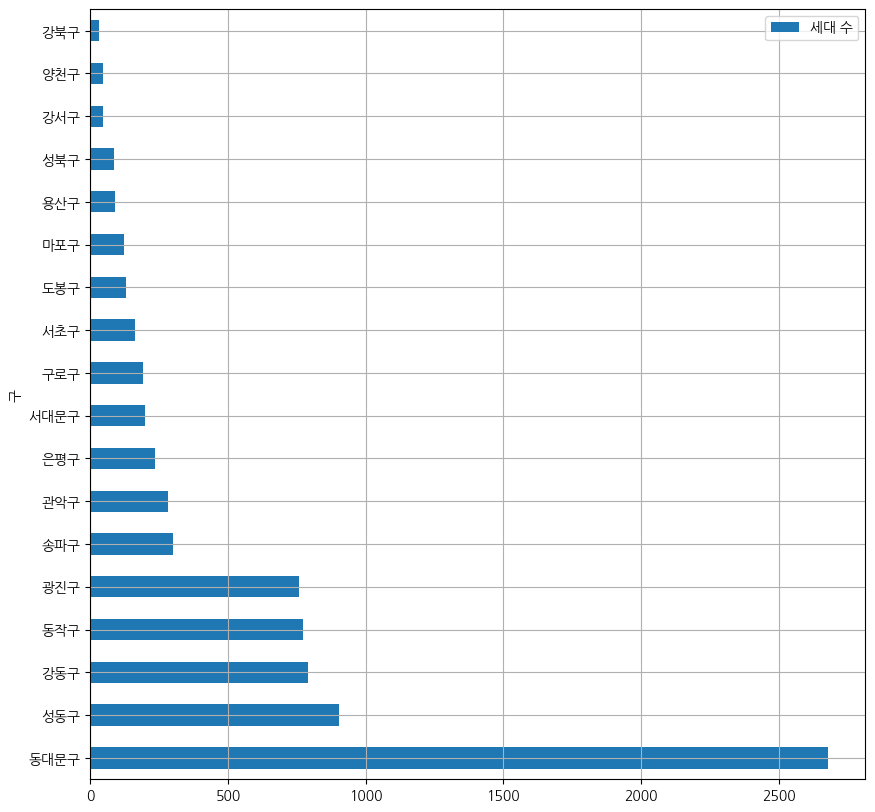

In [39]:
gu_pop.plot(kind='barh',grid=True,figsize=(10,10))

오호 대단지 공급도 열리는군

### 2. 모집공고일 기준 월별 공급 주택 수

In [40]:
my_data['모집월'] = my_data['모집공고일'].str[:7]
my_data.head()

,구,주택명,소재지,세대 수,시공사,문의처,모집공고일,청약기간,당첨자 발표,모집월
0,강동구,더샵 둔촌포레,서울특별시 강동구 둔촌동 30-4번지 외 1필지,74.0,(주)포스코이앤씨,☎ 02-478-8878,2024-02-29,2024-03-11~2024-03-13,2024-03-20,2024-02
1,강동구,에스아이팰리스 올림픽공원,서울특별시 강동구 성내동 459-3,58.0,에스테크건설 주식회사,☎ 02-486-4388,2024-02-23,2024-03-04~2024-03-06,2024-03-13,2024-02
2,서대문구,경희궁 유보라,서울특별시 서대문구 영천동 69-20외 160필지,108.0,(주)반도건설,☎ 1661-0161,2024-02-22,2024-03-04~2024-03-06,2024-03-12,2024-02
3,서초구,메이플자이,서울특별시 서초구 잠원동 60-3,162.0,지에스건설 주식회사,☎ 1833-2566,2024-01-26,2024-02-05~2024-02-08,2024-02-16,2024-01
4,광진구,포제스 한강,서울특별시 광진구 광장동 188-2번지 일원,128.0,디엘이앤씨(주),☎ 1899-7099,2024-01-12,2024-01-24~2024-01-26,2024-02-01,2024-01


In [41]:
gu_date = my_data.pivot_table(index='구',columns='모집월',values='세대 수',aggfunc='sum')
gu_date.fillna(0, inplace=True)
gu_date.head()

모집월,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02
구,,,,,,,,,,
강동구,0.0,34.0,36.0,0.0,0.0,508.0,0.0,80.0,0.0,132.0
강북구,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강서구,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0
관악구,0.0,182.0,0.0,0.0,101.0,0.0,0.0,0.0,0.0,0.0
광진구,0.0,0.0,631.0,0.0,0.0,0.0,0.0,0.0,128.0,0.0


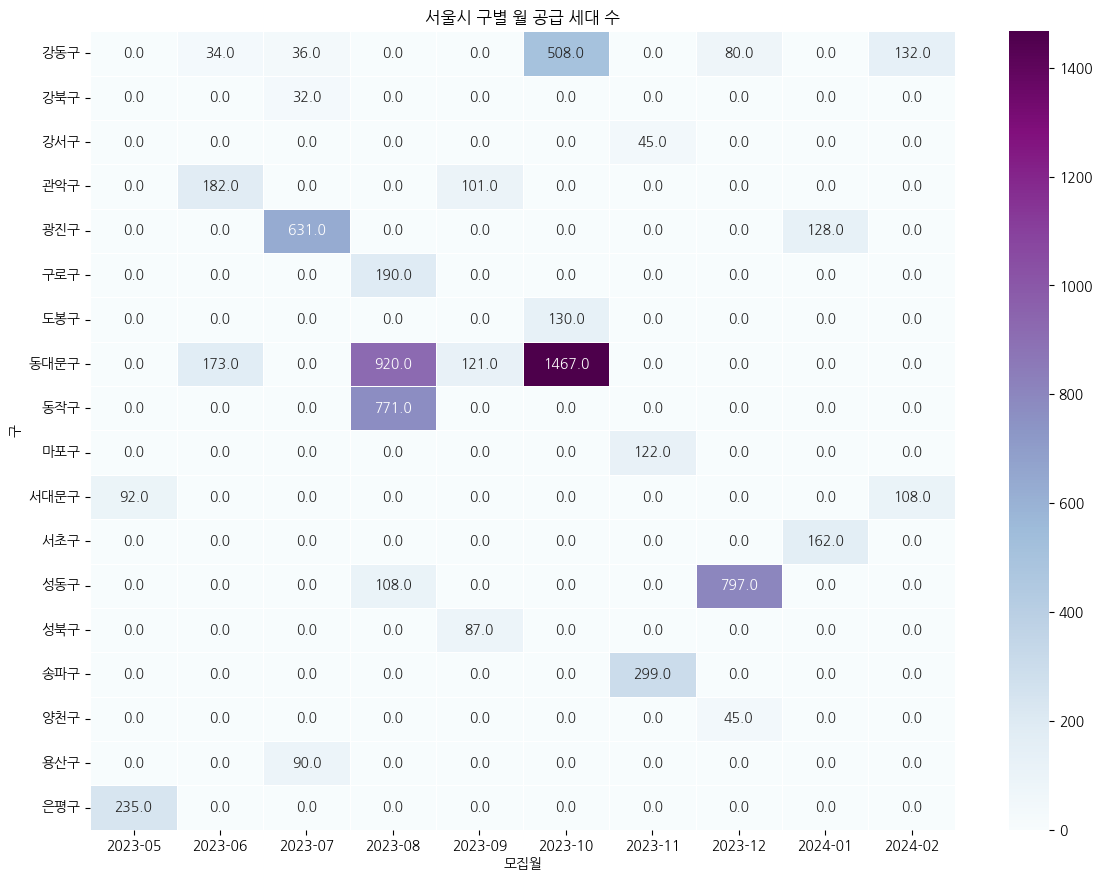

In [113]:
import seaborn as sns

plt.figure(figsize=(13,10))
heatmap = sns.heatmap(gu_date,annot=True,fmt=".1f", linewidths=.5,cmap='BuPu')
plt.title("서울시 구별 월 공급 세대 수")
plt.autoscale() 
plt.tight_layout(pad=5)
plt.show()

매월 공급이 발생하는군

### 3.서울시 최근 주택 공급 추세

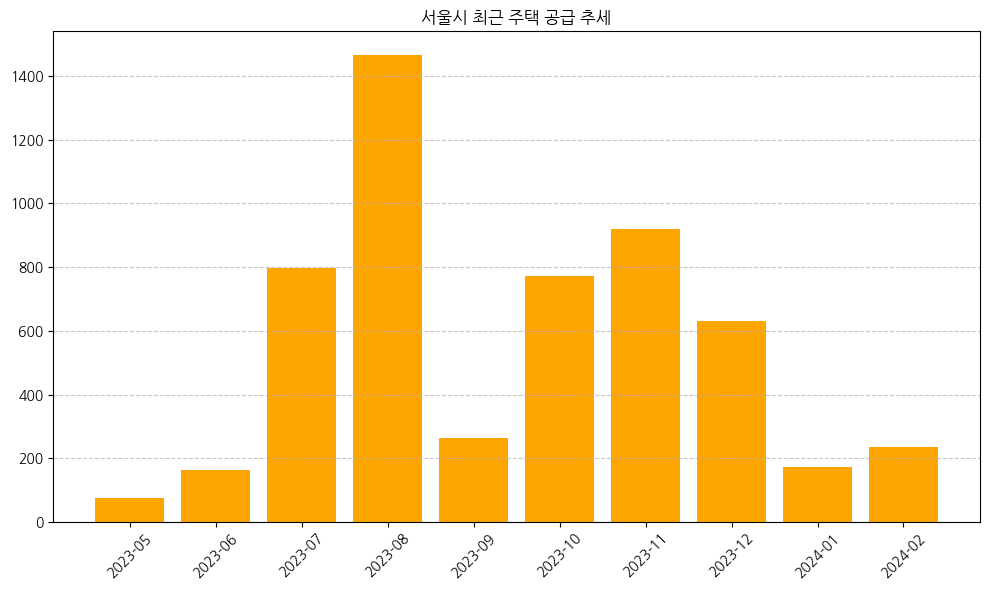

In [111]:
plt.figure(figsize=(10, 6))
plt.bar(my_data['모집월'][::-1], my_data['세대 수'], color='orange')
plt.title('서울시 최근 주택 공급 추세')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. 구별 평당 평균 가격

In [96]:
house_avg_data.head()

,구,주택명,소재지,일반 공급,특별 공급,세대 수,평균 평수,평균 가격,특별 공급 비율,평당 평균 가격
0,강동구,더샵 둔촌포레,서울특별시 강동구 둔촌동 30-4번지 외 1필지,47.0,27.0,74.0,93.33,148540.00,0.36,1591.56
1,강동구,에스아이팰리스 올림픽공원,서울특별시 강동구 성내동 459-3,37.0,21.0,58.0,52.00,123666.67,0.36,2378.21
2,서대문구,경희궁 유보라,서울특별시 서대문구 영천동 69-20외 160필지,57.0,51.0,108.0,77.75,127125.00,0.47,1635.05
3,서초구,메이플자이,서울특별시 서초구 잠원동 60-3,81.0,81.0,162.0,50.00,149850.00,0.50,2997.00
4,광진구,포제스 한강,서울특별시 광진구 광장동 188-2번지 일원,94.0,34.0,128.0,178.00,1048571.43,0.27,5890.85


In [42]:
scale_data = house_avg_data.pivot_table(index='구', values=["평균 평수","평당 평균 가격","특별 공급 비율","평균 가격"], aggfunc='mean')
scale_data = scale_data.round(2)
scale_data.head()

,특별 공급 비율,평균 가격,평균 평수,평당 평균 가격
구,,,,
강동구,0.39,100358.11,60.4,1720.72
강북구,0.00,44925.00,34.5,1302.17
강서구,0.00,107500.00,44.0,2443.18
관악구,0.48,87797.00,64.5,1375.06
광진구,0.31,607740.26,139.0,3779.97


In [43]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

#### 지도버전

In [29]:

geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf=8"))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, title="OpenStreetMap")
folium.Choropleth(geo_data = geo_str,
               data = scale_data,
               columns = [scale_data.index, "평당 평균 가격"],
               key_on = "feature.id",
               fill_color = "PuRd").add_to(map)
map

#### 막대 버전

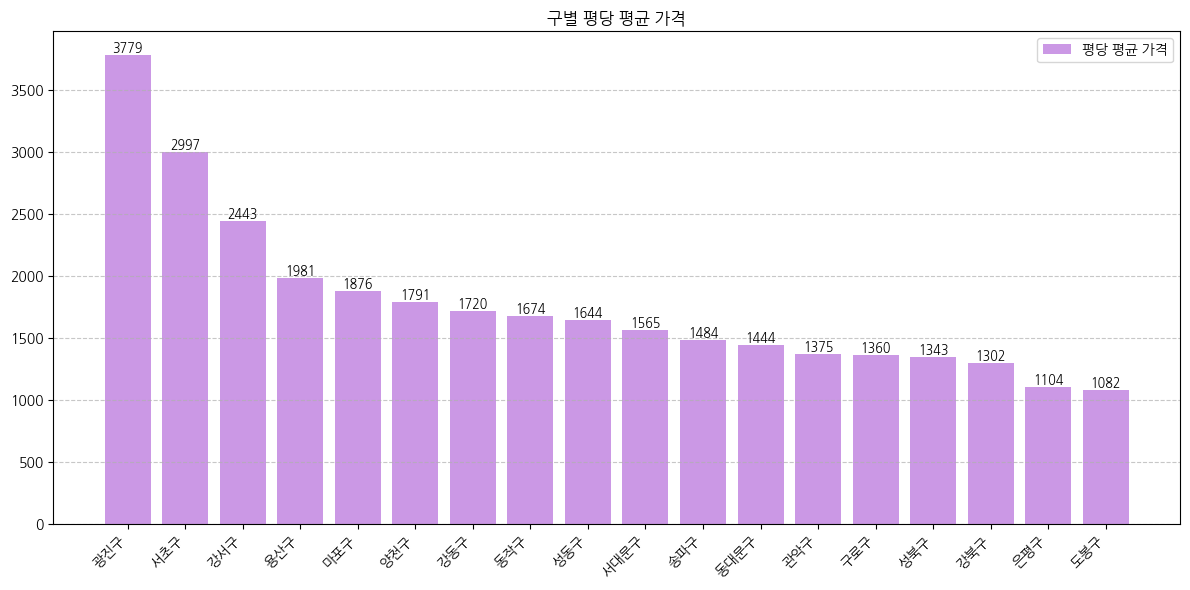

In [164]:

gu_avg_price_sorted = scale_data.sort_values(by='평당 평균 가격', ascending=False)
color =  (0.6, 0.2, 0.8, 0.5) 


plt.figure(figsize=(12, 6))
bars = plt.bar(gu_avg_price_sorted.index, gu_avg_price_sorted["평당 평균 가격"], color=color, label="평당 평균 가격")


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=9)


plt.title('구별 평당 평균 가격')
plt.ylabel('')


plt.xticks(rotation=45, ha='right')


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend()


plt.tight_layout()
plt.show()


#### BoxPlot버전

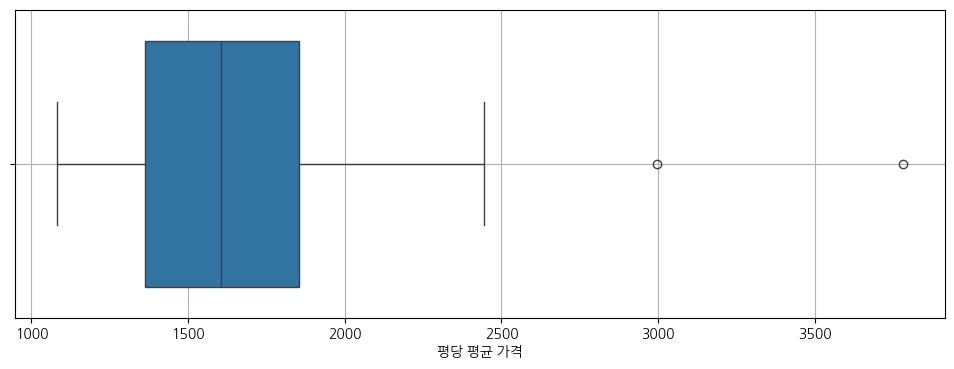

In [132]:
import seaborn as sns 
plt.figure(figsize=(12,4))
sns.boxplot(x='평당 평균 가격', data=gu_avg_price)
plt.grid()
plt.show()

### 4. 구별 평균 공급 평수

In [165]:
scale_data = scale_data.sort_values(by='평균 평수',ascending=False)

In [166]:
scale_data.head()

,특별 공급 비율,평균 가격,평균 평수,평당 평균 가격
구,,,,
광진구,0.31,607740.26,139.00,3779.97
용산구,0.28,198170.00,100.00,1981.70
성북구,0.52,105450.00,78.50,1343.31
은평구,0.49,85692.22,77.56,1104.85
도봉구,0.51,83556.00,77.20,1082.33


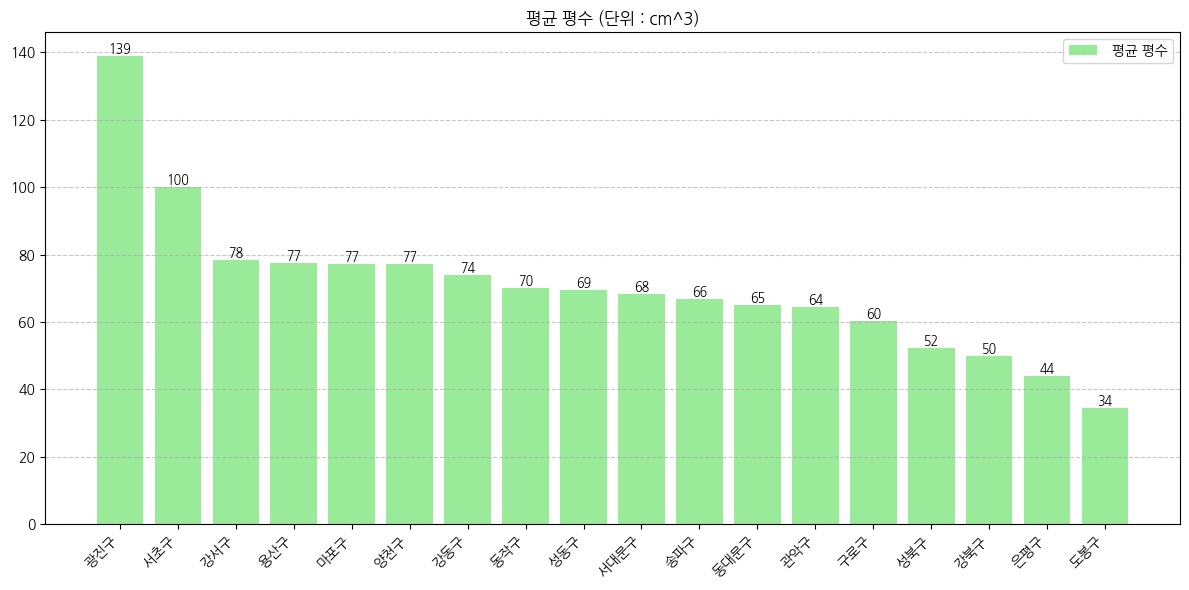

In [183]:

color =  (0.0, 0.8, 0.0, 0.4) 


plt.figure(figsize=(12, 6))
bars = plt.bar(gu_avg_price_sorted.index, scale_data["평균 평수"], color=color, label=" 평균 평수")


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=9)


plt.title('평균 평수 (단위 : cm^3)')
plt.ylabel('')


plt.xticks(rotation=45, ha='right')


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend()


plt.tight_layout()
plt.show()


In [44]:
avg_column = house_avg_data[["평균 평수", "세대 수", "평균 가격", "평당 평균 가격", "특별 공급 비율"]].mean()

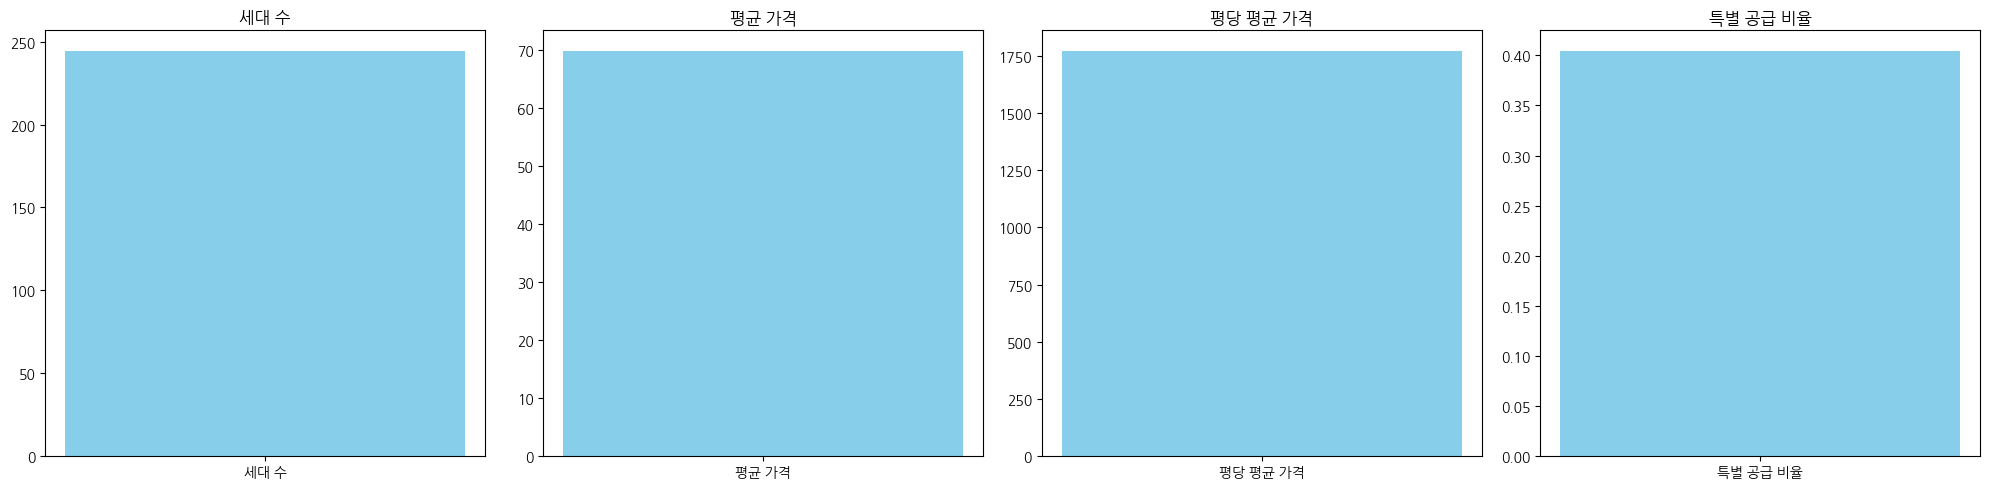

244.5625
69.95875000000001
1772.2875
0.4046875


In [46]:
avg_values = [avg_column["세대 수"], avg_column["평균 평수"], avg_column["평당 평균 가격"], avg_column["특별 공급 비율"]]
columns = ["세대 수", "평균 가격", "평당 평균 가격", "특별 공급 비율"]

# subplot 생성
fig, axes = plt.subplots(1, 4, figsize=(20,5))

# 각 열에 대한 막대 그래프 그리기
for i, ax in enumerate(axes):
    ax.bar(columns[i], avg_values[i], color='skyblue', width=0.1)
    ax.set_title(columns[i])  # 그래프 제목 설정
# 그래프 출력
plt.tight_layout()
plt.show()
for data in avg_values:
    print(data)

### 5. 공급 평수 / 가격 / 특별 공급 비율 한번에 비교

In [169]:
scale_data.head()

,특별 공급 비율,평균 가격,평균 평수,평당 평균 가격
구,,,,
광진구,0.31,607740.26,139.00,3779.97
용산구,0.28,198170.00,100.00,1981.70
성북구,0.52,105450.00,78.50,1343.31
은평구,0.49,85692.22,77.56,1104.85
도봉구,0.51,83556.00,77.20,1082.33


In [171]:
scale_special_data = scale_data.sort_values(by='특별 공급 비율',ascending=False).head(5)
scale_price_data = scale_data.sort_values(by='평균 가격',ascending=False).head(5)
scale_sorted_data = scale_data.sort_values(by='평균 평수',ascending=False).head(5)
scale_avg_data = scale_data.sort_values(by='평당 평균 가격',ascending=False).head(5)

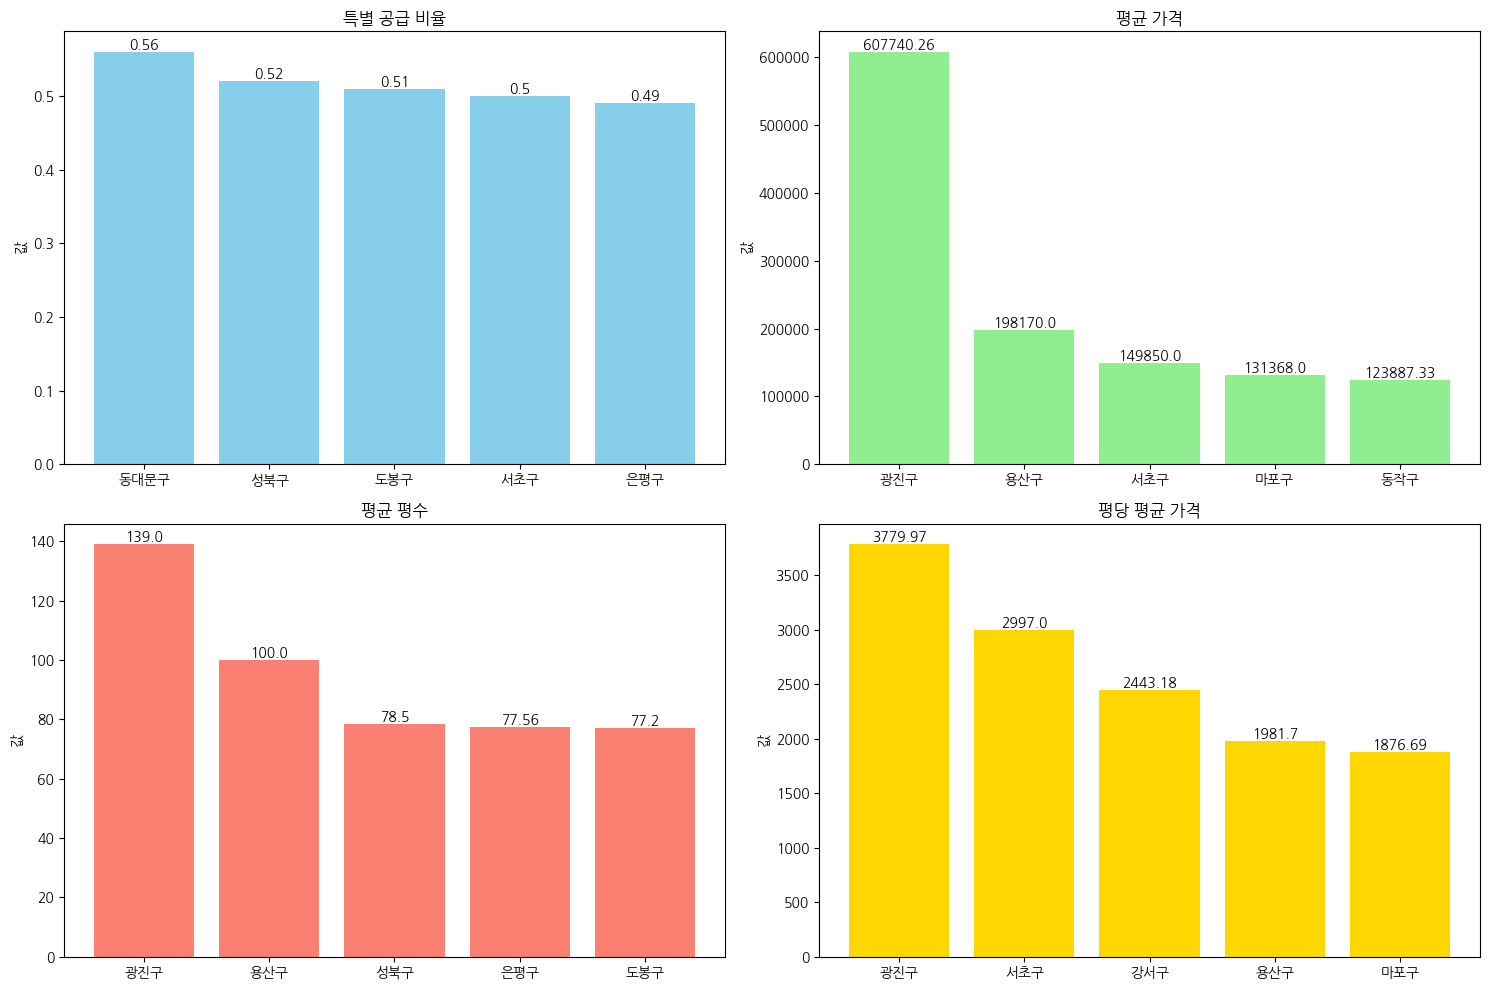

In [184]:


fig, axes = plt.subplots(2, 2, figsize=(15, 10))


for ax, data, column_name, color in zip(axes.ravel(), 
                                 [scale_special_data, scale_price_data, scale_sorted_data, scale_avg_data],
                                 ['특별 공급 비율', '평균 가격', '평균 평수', '평당 평균 가격'],
                                 ['skyblue', 'lightgreen', 'salmon', 'gold']):
    bars = ax.bar(data.index, data[column_name], color=color)
    ax.set_title(column_name)
    ax.set_ylabel('값')
    
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2),
                ha='center', va='bottom')


plt.tight_layout()
plt.show()

### 6. 특별 공급 비율 

In [177]:
my_data["특별 공급 비율"] = house_avg_data["특별 공급 비율"]

In [179]:
special_supply_data = my_data.pivot_table(index='모집월',values='특별 공급 비율',aggfunc='mean')
special_supply_data.fillna(0, inplace=True)
special_supply_data=special_supply_data.round(2)

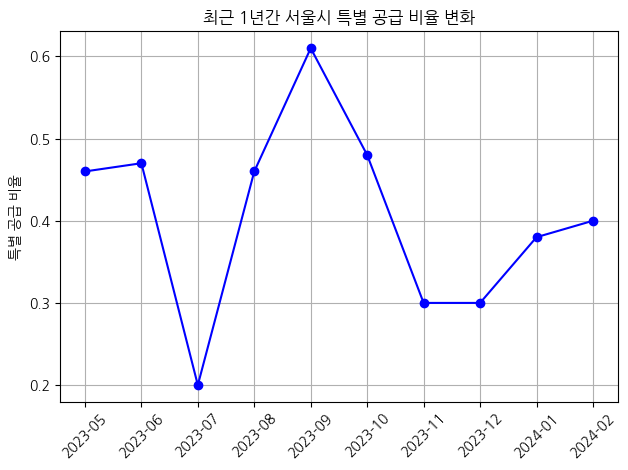

In [182]:
# 꺾은선 그래프 그리기
plt.plot(special_supply_data.index, special_supply_data['특별 공급 비율'], marker='o', color='blue', linestyle='-')
plt.title('최근 1년간 서울시 특별 공급 비율 변화')
plt.ylabel('특별 공급 비율')
plt.xticks(rotation=45)  # x축 눈금 라벨 회전
plt.grid(True)  # 그리드 표시
plt.tight_layout()
plt.show()


### 시공사 별 세대 수

In [16]:
my_data["시공사"] = [data.replace("(주)",'') for data in my_data["시공사"]]
my_data.head()

,구,주택명,소재지,세대 수,시공사,문의처,모집공고일,청약기간,당첨자 발표,모집월
0,강동구,더샵 둔촌포레,서울특별시 강동구 둔촌동 30-4번지 외 1필지,74.0,포스코이앤씨,☎ 02-478-8878,2024-02-29,2024-03-11~2024-03-13,2024-03-20,2024-02
1,강동구,에스아이팰리스 올림픽공원,서울특별시 강동구 성내동 459-3,58.0,에스테크건설 주식회사,☎ 02-486-4388,2024-02-23,2024-03-04~2024-03-06,2024-03-13,2024-02
2,서대문구,경희궁 유보라,서울특별시 서대문구 영천동 69-20외 160필지,108.0,반도건설,☎ 1661-0161,2024-02-22,2024-03-04~2024-03-06,2024-03-12,2024-02
3,서초구,메이플자이,서울특별시 서초구 잠원동 60-3,162.0,지에스건설 주식회사,☎ 1833-2566,2024-01-26,2024-02-05~2024-02-08,2024-02-16,2024-01
4,광진구,포제스 한강,서울특별시 광진구 광장동 188-2번지 일원,128.0,디엘이앤씨,☎ 1899-7099,2024-01-12,2024-01-24~2024-01-26,2024-02-01,2024-01


In [18]:
builder_data = my_data.pivot_table(index='시공사', values="세대 수", aggfunc='sum')
builder_data.head()

,세대 수
시공사,
금호건설,130.0
대우건설,1075.0
두산건설,235.0
디엘건설 주식회사,121.0
디엘이앤씨,391.0


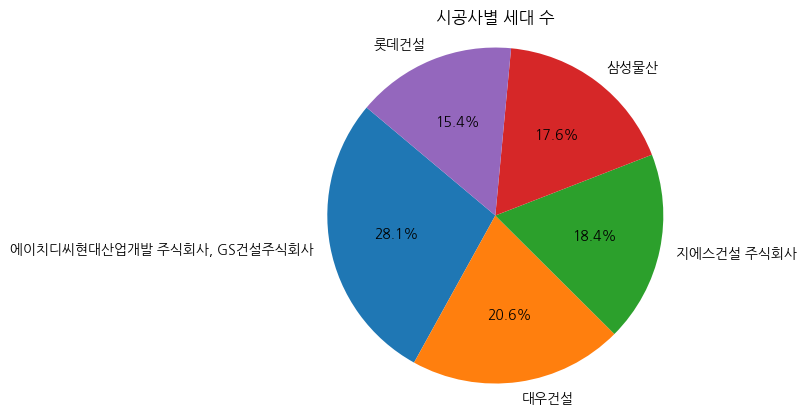

In [26]:
builder_data_ = builder_data.sort_values(by="세대 수",ascending=False).head()
plt.pie(builder_data_["세대 수"].head(),labels=builder_data_.index , autopct='%1.1f%%', startangle=140)

plt.title('시공사별 세대 수')

# Show plot
plt.axis('equal')
plt.show()

#### 결론1 : 특별 공급은 늘고 있는 추세이며, 그 중 신혼 부부 공급이 제일 많다.
    > 신혼부부가 되면 특별공급 가능성이 높아진다..?

#### 결론 2: 매물이 매월 나오긴 한다.

#### 결론 3: 크기는 적당하다 .

#### 결론 4. : 비쌈 ㄷㄷ